### Differential Equation

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}x} = \Psi_1,$

$\frac{\mathrm{d}\Psi_2}{\mathrm{d}x} = \Psi_1 - \Psi_2,$

$\Psi_1(0) = 1, \Psi_2(0) = 2, x \in [0, 5]$

In [1]:
from typing import List
import autograd.numpy as np

from neural_network import MLPNeuralNetwork
from optimizers import gradient_descent, adam
from activation_functions import elu, sigmoid, tanh, arctan
from plotting_tools import plot_ode, plot_system_ode, print_error

In [2]:
PSI_0 = np.array([1, 2])


def derivative(x, psi) -> np.ndarray:
    """Example #4 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_1_dot = psi[0]
    psi_2_dot = psi[0] - psi[1]
    return np.array([psi_1_dot, psi_2_dot])


def analytical_solution(x):
    """Analytical solution to example #4.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    psi_1 = np.exp(x)
    psi_2 = 0.5 * np.exp(x) + 1.5 * np.exp(-x)

    return np.array([psi_1, psi_2])


def trial_solution(
    t: np.array, nn: MLPNeuralNetwork, weights: List[np.array], k=0
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights: The weights and biases of the neural network

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(t),)
    """
    fp = nn.forward(t, weights).reshape(t.size)
    return PSI_0[k] + t * fp

### Training

Iteration:  0
 6.555627113118836
Iteration:  1
 6.248303875787332
Iteration:  2
 5.988764224377187
Iteration:  3
 5.779910049088842
Iteration:  4
 5.612556008032019
Iteration:  5
 5.464498256897143
Iteration:  6
 5.316949789157452
Iteration:  7
 5.162571650761904
Iteration:  8
 5.0003259238575675
Iteration:  9
 4.831132832054646
Iteration:  10
 4.656296147496746
Iteration:  11
 4.477073961900832
Iteration:  12
 4.294590263053528
Iteration:  13
 4.109834448608941
Iteration:  14
 3.923677806393193
Iteration:  15
 3.736888946525722
Iteration:  16
 3.550145389747035
Iteration:  17
 3.3640428605636354
Iteration:  18
 3.1791050261717713
Iteration:  19
 2.995796732882976
Iteration:  20
 2.8145438766486333
Iteration:  21
 2.6357630436856305
Iteration:  22
 2.459903917145526
Iteration:  23
 2.2875069796844696
Iteration:  24
 2.1192778619636186
Iteration:  25
 1.9561770233389681
Iteration:  26
 1.7995178622791523
Iteration:  27
 1.6510554668171624
Iteration:  28
 1.5130291496021968
Iteration:  2

c:\Users\zheyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\numpy\numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


Iteration:  10505
 0.48142956860790515
Iteration:  10506
 0.4814251636631717
Iteration:  10507
 0.48141666374830494
Iteration:  10508
 0.4814041212666429
Iteration:  10509
 0.4813883600037718
Iteration:  10510
 0.48137067503099584
Iteration:  10511
 0.48135240708885646
Iteration:  10512
 0.4813347187328905
Iteration:  10513
 0.48131840156226147
Iteration:  10514
 0.48130385165836304
Iteration:  10515
 0.4812911026898762
Iteration:  10516
 0.4812799235678046
Iteration:  10517
 0.4812699286483593
Iteration:  10518
 0.4812606800154112
Iteration:  10519
 0.481251765818725
Iteration:  10520
 0.48124284889842217
Iteration:  10521
 0.4812336906331753
Iteration:  10522
 0.4812241482395259
Iteration:  10523
 0.48121416734600925
Iteration:  10524
 0.48120375425831685
Iteration:  10525
 0.48119296353753976
Iteration:  10526
 0.4811818679003451
Iteration:  10527
 0.4811705534405117
Iteration:  10528
 0.48115909763379683
Iteration:  10529
 0.48114757318648527
Iteration:  10530
 0.4811360351961089
I

c:\Users\zheyu\AppData\Local\Programs\Python\Python312\Lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)


Iteration:  14690
 0.4385546652822848
Iteration:  14691
 0.4387720961757942
Iteration:  14692
 0.43903828620084606
Iteration:  14693
 0.43934413301271946
Iteration:  14694
 0.439664548220212
Iteration:  14695
 0.4399513536125189
Iteration:  14696
 0.4401387726164468
Iteration:  14697
 0.4401562866958264
Iteration:  14698
 0.4399622909635458
Iteration:  14699
 0.43956836810302097
Iteration:  14700
 0.4390500399356484
Iteration:  14701
 0.438518279790372
Iteration:  14702
 0.4380795162951203
Iteration:  14703
 0.43779991729368983
Iteration:  14704
 0.43769503837899326
Iteration:  14705
 0.43773839857716307
Iteration:  14706
 0.43787856303371353
Iteration:  14707
 0.4380553872772873
Iteration:  14708
 0.43821254213736355
Iteration:  14709
 0.43830736735174164
Iteration:  14710
 0.4383174982998972
Iteration:  14711
 0.43824442752221593
Iteration:  14712
 0.43811010746462525
Iteration:  14713
 0.43794902770342964
Iteration:  14714
 0.4377965097906876
Iteration:  14715
 0.43767938900017356
I

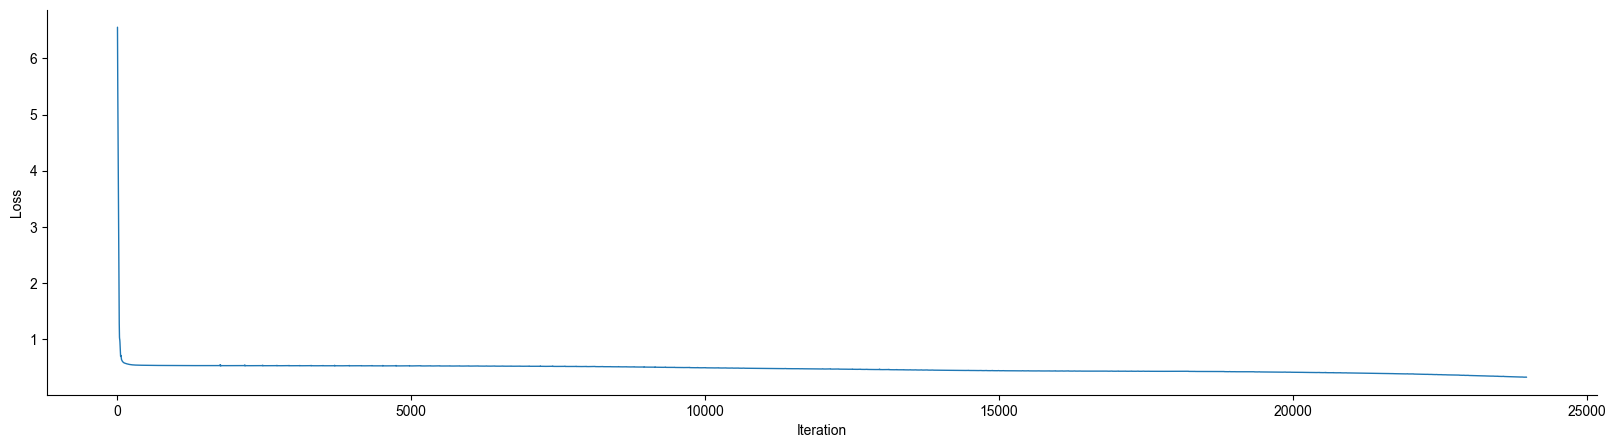

In [3]:
def train():
    t = np.arange(0, 5, 0.1)
    hidden_sizes = np.array([10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn1 = MLPNeuralNetwork(1, hidden_sizes, 1, activation_fns)
    nn2 = MLPNeuralNetwork(1, hidden_sizes, 1, activation_fns)
    adam(
        t,
        [nn1, nn2],
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.01,
        threshold=0.32,
        log=True,
    )

    return [nn1, nn2]


nns = train()

### Evaluating Results

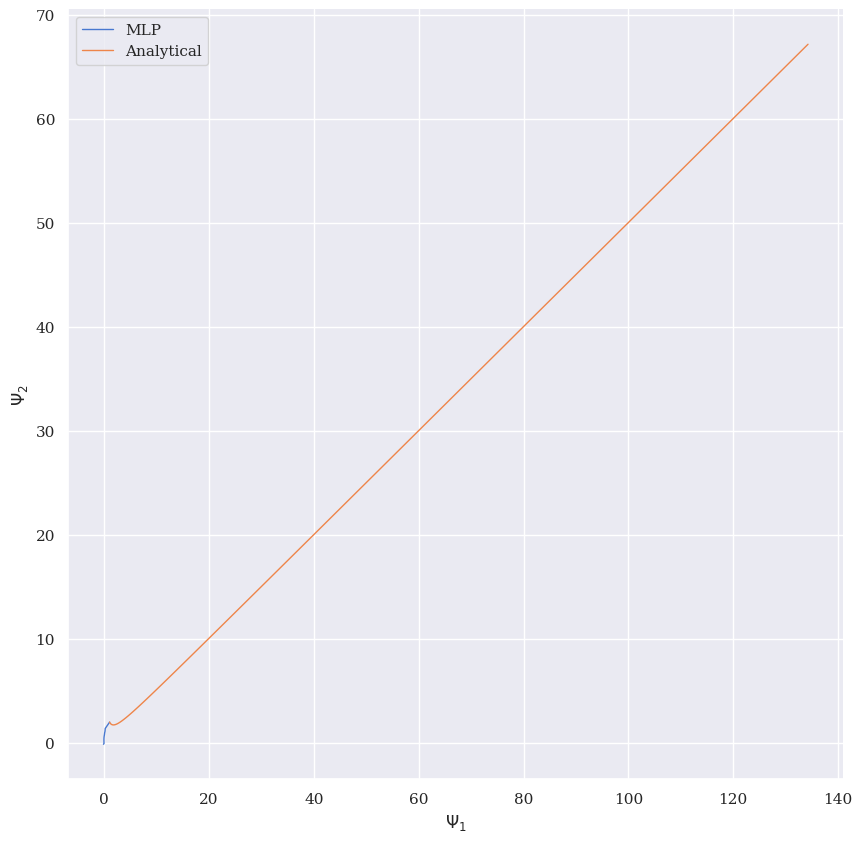

In [5]:
plot_system_ode(nns, trial_solution, analytical_solution, t=np.arange(0, 5, 0.1))

In [6]:
t = np.arange(0, 5, 0.1)
res = np.array([trial_solution(t, nns[i], nns[i].weights, i) for i in range(len(nns))])

an_sol = analytical_solution(t)

print_error(res, an_sol)

[[   0.           -0.93401318   -1.085219     -1.22610315   -1.41199609
    -1.59872657   -1.79288725   -2.00675614   -2.24144659   -2.49582466
    -2.77048674   -3.06783394   -3.39136232   -3.74513306   -4.13350919
    -4.56107003   -5.03262233   -5.55325815   -6.12843286   -6.76405057
    -7.46655155   -8.24300042   -9.1011754   -10.04966009  -11.09793929
   -12.25650071  -13.53694413  -14.95209994  -16.51615851  -18.2448122
   -20.15541167  -22.2671383   -24.60119465  -27.1810149   -30.0324975
   -33.18426253  -36.66793619  -40.51846548  -44.77446611  -49.47860725
   -54.67803683  -60.42485186  -66.77661822  -73.79694538  -81.55612156
   -90.13181593  -99.60985463 -110.08507857 -121.66229148 -134.45730772]
 [   0.           -0.51852481   -0.64722811   -0.67097792   -0.72348121
    -0.78942943   -0.87902984   -0.97716881   -1.08172027   -1.19720789
    -1.32788757   -1.4760545    -1.64261883   -1.82800948   -2.03277479
    -2.257861     -2.50469714   -2.77519323   -3.07171211   -3.39